In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('02-insurance-linear-regression')
jovian.set_colab_id('15wtJ71RCgdOqe61is50VMoZcPdY8wUbN')

# Insurance cost prediction using linear regression

Make a submisson here: https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/assignment/assignment-2-train-your-first-model

In this assignment we're going to use information like a person's age, sex, BMI, no. of children and smoking habit to predict the price of yearly medical bills. This kind of model is useful for insurance companies to determine the yearly insurance premium for a person. The dataset for this problem is taken from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).


We will create a model with the following steps:
1. Download and explore the dataset
2. Prepare the dataset for training
3. Create a linear regression model
4. Train the model to fit the data
5. Make predictions using the trained model


This assignment builds upon the concepts from the first 2 lessons. It will help to review these Jupyter notebooks:
- PyTorch basics: https://jovian.ai/aakashns/01-pytorch-basics
- Linear Regression: https://jovian.ai/aakashns/02-linear-regression
- Logistic Regression: https://jovian.ai/aakashns/03-logistic-regression
- Linear regression (minimal): https://jovian.ai/aakashns/housing-linear-minimal
- Logistic regression (minimal): https://jovian.ai/aakashns/mnist-logistic-minimal

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end . In some cases, you'll be required to choose some hyperparameters (learning rate, batch size etc.). Try to experiment with the hypeparameters to get the lowest loss.


In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy matplotlib pandas torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy matplotlib pandas torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy matplotlib pandas torch torchvision torchaudio

In [ ]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
project_name='02-insurance-linear-regression' # will be used by jovian.commit

## Step 1: Download and explore the data

Let us begin by downloading the data. We'll use the `download_url` function from PyTorch to get the data as a CSV (comma-separated values) file. 

In [ ]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
DATA_FILENAME = "insurance.csv"
download_url(DATASET_URL, '.')

To load the dataset into memory, we'll use the `read_csv` function from the `pandas` library. The data will be loaded as a Pandas dataframe. See this short tutorial to learn more: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [ ]:
dataframe_raw = pd.read_csv(DATA_FILENAME)
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to do a slight customization of the data, so that every participant receives a slightly different version of the dataset. Fill in your name below as a string (enter at least 5 characters)

In [ ]:
your_name = 'brian' # at least 5 characters

The `customize_dataset` function will customize the dataset slightly using your name as a source of random numbers.

In [ ]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi * ord(rand_str[1])/100.
    # scale target
    dataframe.charges = dataframe.charges * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe

In [ ]:
dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,charges
1306,29,female,24.9090,0,yes,16921.069725
206,59,male,30.0960,0,no,12330.463950
191,36,female,29.8680,0,no,5128.059300
573,62,female,42.0204,1,no,33201.001113
76,29,female,33.7326,1,no,4144.783755


Let us answer some basic questions about the dataset. 


**Q: How many rows does the dataset have?**

In [ ]:
num_rows = len(dataframe)
print(num_rows)

1271


**Q: How many columns doe the dataset have**

In [ ]:
num_cols = dataframe.shape[1]
print(num_cols)

6


**Q: What are the column titles of the input variables?**

In [ ]:
input_cols = [i for i in dataframe.columns[:-1]]
input_cols

['age', 'sex', 'bmi', 'children', 'smoker']

**Q: Which of the input columns are non-numeric or categorial variables ?**

Hint: `sex` is one of them. List the columns that are not numbers.

In [ ]:
categorical_cols = [i for i in dataframe.select_dtypes(exclude = ['number']).columns]
categorical_cols

['sex', 'smoker']

**Q: What are the column titles of output/target variable(s)?**

In [ ]:
output_cols = ['charges']

**Q: (Optional) What is the minimum, maximum and average value of the `charges` column? Can you show the distribution of values in a graph?**
Use this data visualization cheatsheet for referece: https://jovian.ml/aakashns/dataviz-cheatsheet

count     1271.000000
mean     14035.956743
std      12842.507034
min       1177.967595
25%       4965.452494
50%       9881.555250
75%      17682.701369
max      66958.949411
Name: charges, dtype: float64


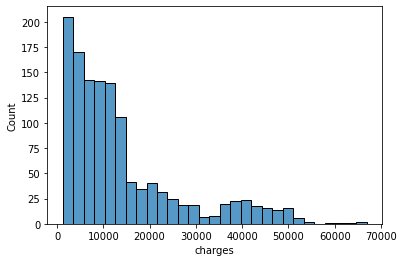

In [ ]:
# Write your answer here
import seaborn as sns

print(dataframe.charges.describe())

sns.histplot(dataframe.charges, kde=False);

Remember to commit your notebook to Jovian after every step, so that you don't lose your work.

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "porkdown/02-insurance-linear-regression" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/porkdown/02-insurance-linear-regression


'https://jovian.ai/porkdown/02-insurance-linear-regression'

## Step 2: Prepare the dataset for training

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. If you've filled out `input_cols`, `categorial_cols` and `output_cols` correctly, this following function will perform the conversion to numpy arrays.

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

Read through the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to understand how we're converting categorical variables into numbers.

In [ ]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[29.    ,  0.    , 24.909 ,  0.    ,  1.    ],
        [59.    ,  1.    , 30.096 ,  0.    ,  0.    ],
        [36.    ,  0.    , 29.868 ,  0.    ,  0.    ],
        ...,
        [40.    ,  0.    , 47.2188,  1.    ,  0.    ],
        [52.    ,  0.    , 20.9019,  0.    ,  0.    ],
        [39.    ,  1.    , 40.242 ,  2.    ,  1.    ]]),
 array([[16921.069725 ],
        [12330.46395  ],
        [ 5128.0593   ],
        ...,
        [29900.5717395],
        [10490.5895325],
        [42109.0845   ]]))

**Q: Convert the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.**

In [ ]:
inputs = torch.from_numpy(inputs_array).float()
targets = torch.from_numpy(targets_array)

In [ ]:
inputs.dtype, targets.dtype

(torch.float32, torch.float64)

Next, we need to create PyTorch datasets & data loaders for training & validation. We'll start by creating a `TensorDataset`.

In [ ]:
dataset = TensorDataset(inputs, targets)

**Q: Pick a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then use `random_split` to create training & validation datasets.**

In [ ]:
val_percent = .20 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

print(val_size)
print(train_size)
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

254
1017


Finally, we can create data loaders for training & validation.

**Q: Pick a batch size for the data loader.**

In [ ]:
batch_size = 50

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[47.0000,  0.0000, 51.6648,  1.0000,  0.0000],
        [23.0000,  0.0000, 41.8038,  2.0000,  1.0000],
        [50.0000,  1.0000, 35.3058,  3.0000,  0.0000],
        [56.0000,  0.0000, 32.2734,  0.0000,  0.0000],
        [24.0000,  1.0000, 26.9667,  0.0000,  0.0000],
        [42.0000,  1.0000, 34.2000,  0.0000,  1.0000],
        [26.0000,  1.0000, 30.8484,  0.0000,  1.0000],
        [58.0000,  0.0000, 37.7340,  0.0000,  0.0000],
        [48.0000,  1.0000, 39.1020,  3.0000,  0.0000],
        [47.0000,  1.0000, 34.0062,  3.0000,  0.0000],
        [61.0000,  1.0000, 41.1540,  3.0000,  0.0000],
        [47.0000,  0.0000, 33.6813,  1.0000,  0.0000],
        [30.0000,  0.0000, 44.5170,  3.0000,  1.0000],
        [32.0000,  1.0000, 32.0568,  4.0000,  1.0000],
        [29.0000,  0.0000, 33.7326,  1.0000,  0.0000],
        [48.0000,  0.0000, 35.4882,  0.0000,  0.0000],
        [19.0000,  0.0000, 32.2620,  0.0000,  1.0000],
        [19.0000,  0.0000, 26.6760,  2.0000,  0.0000],
  

Let's save our work by committing to Jovian.

In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "porkdown/02-insurance-linear-regression" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/porkdown/02-insurance-linear-regression


'https://jovian.ai/porkdown/02-insurance-linear-regression'

## Step 3: Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression (we'll build more complex models in the next assignment). 


In [ ]:
input_size = len(input_cols)
output_size = len(output_cols)

**Q: Complete the class definition below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.**

Hint: Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions

In [ ]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets)                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets)                           # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

Let us create a model using the `InsuranceModel` class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [ ]:
model = InsuranceModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3028, -0.3116,  0.0360, -0.0528, -0.2739]], requires_grad=True),
 Parameter containing:
 tensor([0.4068], requires_grad=True)]

One final commit before we train the model.

In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "porkdown/02-insurance-linear-regression" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/porkdown/02-insurance-linear-regression


'https://jovian.ai/porkdown/02-insurance-linear-regression'

## Step 4: Train the model to fit the data

To train our model, we'll use the same `fit` function explained in the lecture. That's the benefit of defining a generic training loop - you can use it for any problem.

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Q: Use the `evaluate` function to calculate the loss on the validation set before training.**

In [ ]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 14363.434003793016}



We are now ready to train the model. You may need to run the training loop many times, for different number of epochs and with different learning rates, to get a good result. Also, if your loss becomes too large (or `nan`), you may have to re-initialize the model by running the cell `model = InsuranceModel()`. Experiment with this for a while, and try to get to as low a loss as possible.

**Q: Train the model 4-5 times with different learning rates & for different number of epochs.**

Hint: Vary learning rates by orders of 10 (e.g. `1e-2`, `1e-3`, `1e-4`, `1e-5`, `1e-6`) to figure out what works.

In [ ]:
epochs = 1000
lr = 1e-1
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7486.6141
Epoch [40], val_loss: 7367.4247
Epoch [60], val_loss: 7370.4325
Epoch [80], val_loss: 7366.2083
Epoch [100], val_loss: 7362.6553
Epoch [120], val_loss: 7361.3832
Epoch [140], val_loss: 7359.0139
Epoch [160], val_loss: 7354.4156
Epoch [180], val_loss: 7350.5579
Epoch [200], val_loss: 7348.9138
Epoch [220], val_loss: 7352.1306
Epoch [240], val_loss: 7345.0513
Epoch [260], val_loss: 7337.9749
Epoch [280], val_loss: 7341.9155
Epoch [300], val_loss: 7332.1657
Epoch [320], val_loss: 7331.0931
Epoch [340], val_loss: 7331.5500
Epoch [360], val_loss: 7326.3439
Epoch [380], val_loss: 7322.2722
Epoch [400], val_loss: 7320.2625
Epoch [420], val_loss: 7317.7070
Epoch [440], val_loss: 7321.7545
Epoch [460], val_loss: 7323.6130
Epoch [480], val_loss: 7311.9941
Epoch [500], val_loss: 7315.7026
Epoch [520], val_loss: 7310.8563
Epoch [540], val_loss: 7305.9562
Epoch [560], val_loss: 7306.6065
Epoch [580], val_loss: 7302.7602
Epoch [600], val_loss: 7302.8791
Epoch [620], v

In [ ]:
epochs = 1000
lr = 3e-1
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7263.2240
Epoch [40], val_loss: 7290.1101
Epoch [60], val_loss: 7244.4285
Epoch [80], val_loss: 7262.6289
Epoch [100], val_loss: 7245.5520
Epoch [120], val_loss: 7253.0178
Epoch [140], val_loss: 7237.2761
Epoch [160], val_loss: 7218.5342
Epoch [180], val_loss: 7214.6547
Epoch [200], val_loss: 7201.0226
Epoch [220], val_loss: 7195.0359
Epoch [240], val_loss: 7209.9036
Epoch [260], val_loss: 7194.6932
Epoch [280], val_loss: 7176.7059
Epoch [300], val_loss: 7183.0921
Epoch [320], val_loss: 7166.0875
Epoch [340], val_loss: 7158.2200
Epoch [360], val_loss: 7159.1808
Epoch [380], val_loss: 7146.1365
Epoch [400], val_loss: 7144.2395
Epoch [420], val_loss: 7172.6679
Epoch [440], val_loss: 7130.3683
Epoch [460], val_loss: 7140.8301
Epoch [480], val_loss: 7122.7256
Epoch [500], val_loss: 7118.9573
Epoch [520], val_loss: 7132.0380
Epoch [540], val_loss: 7104.9210
Epoch [560], val_loss: 7091.3639
Epoch [580], val_loss: 7085.7245
Epoch [600], val_loss: 7082.0722
Epoch [620], v

In [ ]:
epochs = 1000
lr = 4e-2
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6956.7098
Epoch [40], val_loss: 6955.8130
Epoch [60], val_loss: 6955.5340
Epoch [80], val_loss: 6954.7314
Epoch [100], val_loss: 6953.8184
Epoch [120], val_loss: 6953.6028
Epoch [140], val_loss: 6952.4803
Epoch [160], val_loss: 6953.8215
Epoch [180], val_loss: 6950.8199
Epoch [200], val_loss: 6949.9781
Epoch [220], val_loss: 6950.7057
Epoch [240], val_loss: 6948.2131
Epoch [260], val_loss: 6947.0892
Epoch [280], val_loss: 6946.0581
Epoch [300], val_loss: 6945.9061
Epoch [320], val_loss: 6945.1062
Epoch [340], val_loss: 6943.5817
Epoch [360], val_loss: 6942.7656
Epoch [380], val_loss: 6942.1925
Epoch [400], val_loss: 6943.1057
Epoch [420], val_loss: 6940.5285
Epoch [440], val_loss: 6940.1412
Epoch [460], val_loss: 6938.7199
Epoch [480], val_loss: 6938.4476
Epoch [500], val_loss: 6939.1821
Epoch [520], val_loss: 6936.4675
Epoch [540], val_loss: 6935.5060
Epoch [560], val_loss: 6934.9699
Epoch [580], val_loss: 6936.0451
Epoch [600], val_loss: 6933.3578
Epoch [620], v

In [ ]:
epochs = 1000
lr = 5e-2
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6916.2601
Epoch [40], val_loss: 6915.7604
Epoch [60], val_loss: 6916.5568
Epoch [80], val_loss: 6914.1625
Epoch [100], val_loss: 6913.1479
Epoch [120], val_loss: 6914.0511
Epoch [140], val_loss: 6913.5565
Epoch [160], val_loss: 6909.4328
Epoch [180], val_loss: 6909.1773
Epoch [200], val_loss: 6906.9826
Epoch [220], val_loss: 6906.3040
Epoch [240], val_loss: 6905.4782
Epoch [260], val_loss: 6904.1404
Epoch [280], val_loss: 6902.9288
Epoch [300], val_loss: 6904.8933
Epoch [320], val_loss: 6904.1744
Epoch [340], val_loss: 6904.6092
Epoch [360], val_loss: 6899.6577
Epoch [380], val_loss: 6897.7174
Epoch [400], val_loss: 6897.6908
Epoch [420], val_loss: 6895.9737
Epoch [440], val_loss: 6894.8693
Epoch [460], val_loss: 6894.5884
Epoch [480], val_loss: 6894.1781
Epoch [500], val_loss: 6893.0127
Epoch [520], val_loss: 6891.8099
Epoch [540], val_loss: 6889.5619
Epoch [560], val_loss: 6888.8579
Epoch [580], val_loss: 6889.4857
Epoch [600], val_loss: 6889.7157
Epoch [620], v

In [ ]:
epochs = 2000
lr = 5e-2
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6271.7588
Epoch [40], val_loss: 6272.7867
Epoch [60], val_loss: 6270.5053
Epoch [80], val_loss: 6269.6913
Epoch [100], val_loss: 6267.9470
Epoch [120], val_loss: 6266.8281
Epoch [140], val_loss: 6265.9430
Epoch [160], val_loss: 6264.7567
Epoch [180], val_loss: 6264.2775
Epoch [200], val_loss: 6263.0096
Epoch [220], val_loss: 6262.5576
Epoch [240], val_loss: 6260.8062
Epoch [260], val_loss: 6260.1412
Epoch [280], val_loss: 6259.8150
Epoch [300], val_loss: 6258.2773
Epoch [320], val_loss: 6257.0845
Epoch [340], val_loss: 6255.8064
Epoch [360], val_loss: 6254.9274
Epoch [380], val_loss: 6254.2442
Epoch [400], val_loss: 6253.0084
Epoch [420], val_loss: 6251.8691
Epoch [440], val_loss: 6251.0446
Epoch [460], val_loss: 6249.8994
Epoch [480], val_loss: 6249.4557
Epoch [500], val_loss: 6248.0648
Epoch [520], val_loss: 6247.4784
Epoch [540], val_loss: 6245.9140
Epoch [560], val_loss: 6244.9575
Epoch [580], val_loss: 6244.4903
Epoch [600], val_loss: 6243.3185
Epoch [620], v

**Q: What is the final validation loss of your model?**

In [ ]:
val_loss = 6173

Let's log the final validation loss to Jovian and commit the notebook

In [ ]:
jovian.log_metrics(val_loss=val_loss)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "porkdown/02-insurance-linear-regression" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/porkdown/02-insurance-linear-regression


'https://jovian.ai/porkdown/02-insurance-linear-regression'

Now scroll back up, re-initialize the model, and try different set of values for batch size, number of epochs, learning rate etc. Commit each experiment and use the "Compare" and "View Diff" options on Jovian to compare the different results.

## Step 5: Make predictions using the trained model

**Q: Complete the following function definition to make predictions on a single input**

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([37.0000,  1.0000, 41.2566,  0.0000,  0.0000])
Target: tensor([20175.4408], dtype=torch.float64)
Prediction: tensor([6147.3726])


In [ ]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([40.0000,  0.0000, 25.3308,  2.0000,  1.0000])
Target: tensor([20416.4791], dtype=torch.float64)
Prediction: tensor([14145.1455])


In [ ]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([40.0000,  0.0000, 47.2188,  1.0000,  0.0000])
Target: tensor([29900.5717], dtype=torch.float64)
Prediction: tensor([7666.4761])
